# ODIR Classification

This notebook utilizes TensorFlow and ResNet50 to classify medical conditions based on Fundus (eye) photographs. The goal is to leverage deep learning techniques to assist in the accurate diagnosis of ocular diseases from digital fundus images.


# **IMPORTANT**

**To ensure functionality of this application it is advised that all cells are run in order, to run a cell click the checkmark by hovering in the top left corner of the cell, failing to do so may cause unexpected errors.**

In [ ]:
DISEASE_NAMES = {
    'N': 'Normal',
    'D': 'Diabetes',
    'G': 'Glaucoma',
    'C': 'Cataract',
    'A': 'Age related Macular Degeneration',
    'H': 'Hypertension',
    'M': 'Pathological Myopia'
}


## Patient Age Distribution Analysis

In this section, we explore the age distribution of patients included in the ODIR dataset. Understanding the age distribution is crucial as it gives insights into the demographic profile of the dataset. This can have implications on the model's applicability to different age groups and may highlight the need for a balanced representation of ages in the dataset.

We start by importing necessary libraries - `pandas` for data manipulation, `matplotlib.pyplot` and `seaborn` for data visualization. Then, we load the dataset and use a histogram to visualize the age distribution. This visual representation helps in quickly grasping the spread and central tendency of patients' ages in the dataset.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Retrieve file paths from environment variables, with local defaults
csv_path = os.getenv('CSV_PATH', 'data/full_df.csv')
py_script_path = os.getenv('PY_SCRIPT', 'model_prediction_V2.py')
history_path = os.getenv('HISTORY_PATH', 'data/training_history.csv')

# Load the CSV file directly from the local project
df = pd.read_csv(csv_path)

# Optionally, if needed, you can execute the Python script from the local project.
if os.path.exists(py_script_path):
    with open(py_script_path, 'r') as file:
        code = compile(file.read(), py_script_path, 'exec')
        exec(code)

# If there's a training history file, load it directly.
if os.path.exists(history_path):
    # Adjust the method based on the file type. Here assumed as CSV:
    training_history = pd.read_csv(history_path)
else:
    training_history = None

# Age Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Patient Age'], kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



## Medical Condition Frequency Analysis

In this part of the analysis, we focus on understanding the frequency of each medical condition in the dataset. This is an essential step in identifying the prevalence of different ocular diseases and ensuring that our model is trained on a representative sample of conditions.

We start by defining the list of conditions represented in the dataset: ['N', 'D', 'G', 'C', 'A', 'H', 'M']. These abbreviations stand for different eye diseases and conditions. We then calculate the frequency of each condition in the dataset.

To make our visualization more informative, we map the condition abbreviations to their full names using the `DISEASE_NAMES` dictionary. This enhances readability and comprehension.

A bar chart is then used to visualize these frequencies. This type of chart offers a clear, comparative view of how common or rare each condition is within the dataset. We also rotate the x-axis labels (condition names) for better readability. Such a visual exploration is pivotal for understanding the data distribution and can inform decisions related to model training, such as handling class imbalance.


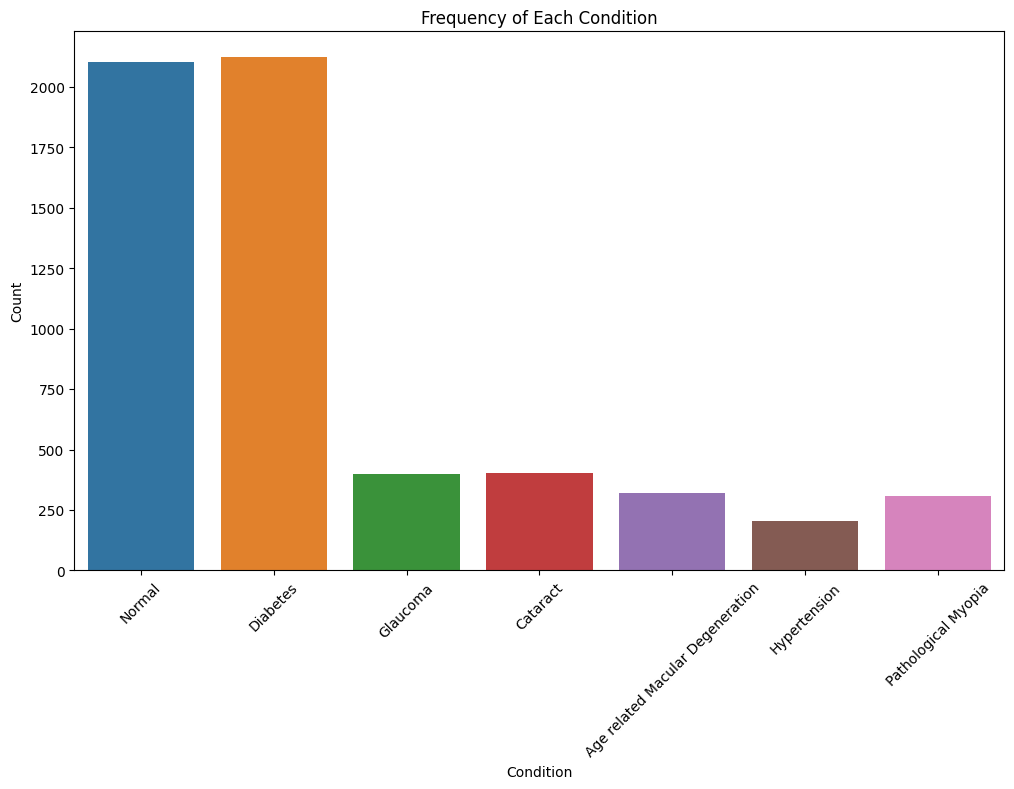

In [ ]:
# Condition Frequency Bar Chart
conditions = ['N', 'D', 'G', 'C', 'A', 'H', 'M']
condition_counts = df[conditions].sum()

# Mapping condition codes to full names
condition_counts.index = [DISEASE_NAMES[condition] for condition in condition_counts.index]

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x=condition_counts.index, y=condition_counts.values)
plt.title('Frequency of Each Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotates the condition names for better readability
plt.show()

## Disease Prevalence Analysis by Age

This section of the notebook is dedicated to exploring how the prevalence of various eye conditions varies across different ages. Such an analysis is vital in understanding age-related trends in ocular diseases, which can be crucial for targeted diagnostics and treatments.

We begin by importing `pandas` for data handling, `matplotlib.pyplot`, and `seaborn` for graphical representation. Our primary dataset is assumed to be loaded into the DataFrame `df`.

The approach involves:
1. **Grouping Data by Age**: We group the dataset by 'Patient Age' and sum the occurrences of each disease for each age group. This aggregation gives us a clear picture of disease prevalence across different ages.
2. **Visualization**: We use `seaborn` to create line plots for each disease condition. Line plots are chosen for their effectiveness in showing trends and patterns over a continuous variable—in this case, age. We iterate over each disease, plotting its prevalence against age. For better understanding, we use the `DISEASE_NAMES` dictionary to label each disease with its full name rather than the abbreviation.
3. **Customizing the Plot**: We set an appropriate size for the plot to ensure clarity and readability. Additionally, we add a title, axis labels, and a legend. The legend is particularly important here, as it helps differentiate between the various diseases on the graph.

This visual analysis helps in identifying which diseases are more common in certain age brackets, providing insights that could be vital for medical research and healthcare planning.


<Figure size 1200x800 with 0 Axes>

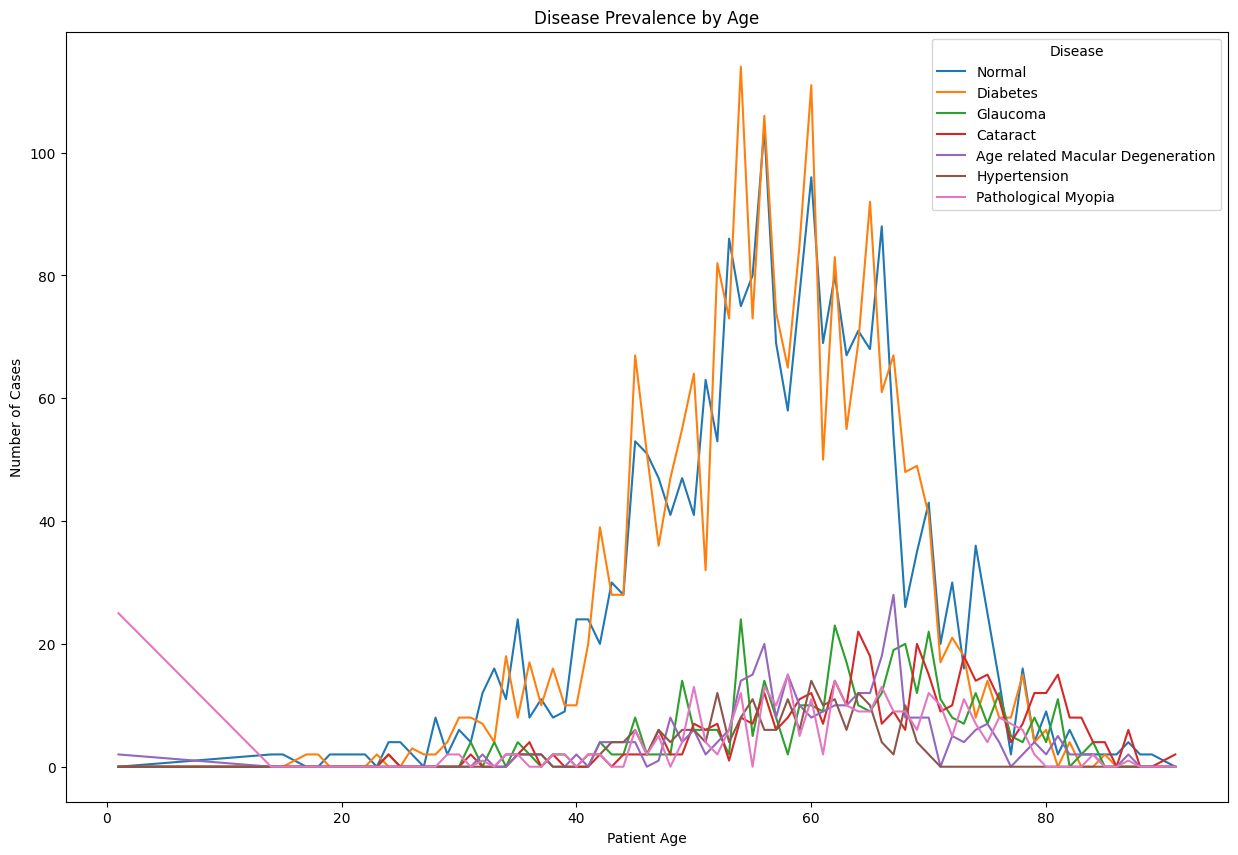

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Summing up all disease columns for each age
age_disease_data = df.groupby('Patient Age')[['D', 'G', 'C', 'A', 'H', 'M']].sum().reset_index()
# Set the size of the plot
plt.figure(figsize=(12, 8))

# Summing up all disease columns for each age
age_disease_data = df.groupby('Patient Age')[['N', 'D', 'G', 'C', 'A', 'H', 'M', 'O']].sum().reset_index()

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Plotting each disease with full names
for disease_code, disease_name in DISEASE_NAMES.items():
    sns.lineplot(data=age_disease_data, x='Patient Age', y=disease_code, label=disease_name)

plt.title('Disease Prevalence by Age')
plt.xlabel('Patient Age')
plt.ylabel('Number of Cases')
plt.legend(title='Disease')
plt.show()


## Interactive Image Upload and Prediction

In this part of the notebook, we create an interactive interface for uploading fundus photographs and predicting ocular conditions. This feature allows for a more user-friendly way to apply our trained model for real-time predictions.

### Implementation Details:

1. **Importing Necessary Libraries**:
   - `ipywidgets`: For creating interactive UI elements like buttons and upload widgets.
   - `IPython.display`: To display the widgets in the notebook.
   - `importlib`: For dynamically loading our `model_prediction` script, which contains the prediction logic.
   - `numpy` and `pandas`: For data manipulation and handling.

2. **Loading the Model Prediction Script**:
   We dynamically load the `model_prediction` script using `importlib`. This script contains our model's preprocessing and prediction functions.

3. **Setting Up the UI**:
   - An upload widget (`uploader`) allows users to upload fundus images.
   - A 'Predict' button triggers the prediction process.
   - A log output area displays the prediction results.
   - A 'Clear' button to reset the upload widget.

4. **Prediction Process**:
   Once the 'Predict' button is clicked, the uploaded images are processed, and the model makes predictions. The results, including the most likely condition for each image, are displayed in the log output area.

5. **Clearing Uploads**:
   Users can clear their uploads and start over using the 'Clear' button.

6. **Model Training and Evaluation**:
The model was trained over approximately 30 epochs in an earlier phase. It reached an accuracy of about 52%, a figure influenced by the complexity of diagnosing ocular diseases through fundus images. Many eye conditions present similar symptoms in these images, making distinct identification challenging.


**I have provided a set of Testing Images in the provided folder for your ease of use simply upload any images you wish to have evaulated**


In [ ]:
import os
import ipywidgets as widgets
from IPython.display import display, Image
import importlib.util
import numpy as np
import pandas as pd
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Retrieve file paths for local data and model script
csv_file_path = os.getenv('CSV_PATH', 'data/full_df.csv')
model_script_path = os.getenv('PY_SCRIPT', 'model_prediction_V2.py')

# Load the CSV file from the local file system
dataframe = pd.read_csv(csv_file_path)

# Import the model prediction module from the local file
spec = importlib.util.spec_from_file_location("model_prediction", model_script_path)
model_predictor = importlib.util.module_from_spec(spec)
spec.loader.exec_module(model_predictor)


# Prediction function for a given image content
def predict_from_image(image_bytes, image_label="Image"):
    preprocessed_img = model_predictor.preprocess_image(image_bytes)
    prediction = model_predictor.predict_condition(preprocessed_img)
    highest_prob_index = np.argmax(prediction[0])
    # DISEASE_NAMES is assumed to be available in the global scope
    condition_keys = list(DISEASE_NAMES.keys())
    predicted_condition = condition_keys[highest_prob_index]
    formatted_prediction = ', '.join(
        [f'{DISEASE_NAMES[key]} ({key}): {prob:.2f}' for key, prob in zip(DISEASE_NAMES, prediction[0])]
    )
    print(f"Prediction for {image_label}: {formatted_prediction}")
    print(f"Most likely condition: {DISEASE_NAMES[predicted_condition]} ({predicted_condition})")


# Check if a local image is predefined in the environment
predefined_image_path = os.getenv('LOCAL_IMAGE')
if predefined_image_path and os.path.exists(predefined_image_path):
    print(f"Using predefined local image: {predefined_image_path}")
    with open(predefined_image_path, 'rb') as img_file:
        image_data = img_file.read()
    predict_from_image(image_data, image_label="Predefined Image")
    print("Prediction for predefined image completed.")
else:
    # Setup interactive upload widgets if no predefined image is provided
    uploader_widget = widgets.FileUpload(accept='image/*', multiple=True)
    predict_button = widgets.Button(description="Predict")
    output_log = widgets.Output()
    clear_button = widgets.Button(description="Clear")


    def on_predict_button_click(b):
        with output_log:
            total_files = len(uploader_widget.value)
            print(f"Predictions in progress, please wait... (0 / {total_files})")
            file_counter = 0
            for file_name, file_info in uploader_widget.value.items():
                file_counter += 1
                print(f"Processing {file_counter} / {total_files}: {file_name}")
                file_content = file_info['content']
                predict_from_image(file_content, image_label=file_name)
            print("All predictions completed.")


    predict_button.on_click(on_predict_button_click)


    def on_clear_button_click(b):
        uploader_widget.value.clear()
        uploader_widget._counter = 0
        output_log.clear_output()
        print("Uploads and output cleared.")


    clear_button.on_click(on_clear_button_click)

    display(widgets.HBox([uploader_widget, predict_button, clear_button]))
    display(output_log)


Output()

Uploads and output cleared.
Uploads and output cleared.


## Visualization of Training Progress for Model Version 3

This section of the notebook focuses on analyzing the training progress of Model Version 3. We load and visualize the training and validation accuracy to understand how the model has learned and evolved over the training epochs.

### Key Points:

1. **Loading Training History**:
   We load the training history from a pickle file. This history contains metrics recorded during the training of Model Version 3.

2. **Model V3 vs. Model V2**:
   - In Model Version 2, we observed that the training started with an accuracy of around 52% and plateaued in this range.
   - Unlike Model Version 2, where we didn't save the state and thus lost some historical data, Model Version 3's training history is meticulously recorded and preserved.

3. **Plotting Accuracy Trends**:
   - We extract the training and validation accuracy from the history and plot these metrics across epochs.
   - The plot provides a visual representation of the model's learning curve, showing how the accuracy changes with each epoch.
   - It's crucial to note that while Model V2 showed a plateau around 50-52%, the aim with Model V3 was to see if further training or adjustments in the model could break this plateau.

4. **Insights from Model V3**:
   - The plot is particularly valuable in identifying whether Model V3 has overcome the stagnation observed in V2.
   - We look for trends such as improvements in accuracy, signs of overfitting, or whether the model's performance has declined compared to the previous version.

5. **Observations**:
   - A total of around 30 epochs were used for training Model V2. However, in Model V3, we noticed a stagnation and wanted a visualization of this by demonstrating the epochs.

By comparing the performance of different model versions, we can make informed decisions about model architecture, training duration, and other parameters for further optimization.


In [ ]:
import os
import pickle
import matplotlib.pyplot as plt
from dotenv import load_dotenv

load_dotenv()

history_path = os.getenv('HISTORY_PATH', 'data/training_history.pkl')

with open(history_path, 'rb') as file:
    history = pickle.load(file)

train_acc = history.get('accuracy', [])
val_acc = history.get('val_accuracy', [])

# Plotting training and validation accuracy over epochs
epochs = range(1, len(train_acc) + 1)
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

